# Yelp Review Analysis - city & keywords

Author: Ruixuan Zhao

In [0]:
# import 
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import os

from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/My Drive"

os.chdir(path)
os.listdir(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['Colab Notebooks',
 'STAT628_module2.gslides',
 'Yelp_Review',
 '回归分析方法及其在实验研究与设计中的应用.gslides',
 'yelp.jpg',
 'Yelp_City_wordcloud.ipynb']

In [0]:
review_word = pd.read_csv("Yelp_Review/mexican_review_p.csv")

In [0]:
review_word.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,6BnQwlxRn7ZuWdzninM9sQ,JSrP-dUmLlwZiI7Dp3PQ2A,cHdJXLlKNWixBXpDwEGb_A,3.0,2015-04-01 16:30:00,love chinese food love mexican food go wrong c...,1,7,1
1,S337tATeouQJdoPYyir29w,2mxBNBeFrgDszqGS5tdEHA,d_L-rfS1vT3JMzgCUGtiow,5.0,2016-07-25 03:57:19,pick meat planet chef make mexican style dish ...,0,0,0
2,j3vP8537KHvoXNHQIr3haA,Z_HE_KKT7N-WddPTzUQC7A,jScBTQtdAt-8RshaiBEHgw,5.0,2018-05-28 20:56:05,party 3 order fish tacos pork belly banh mi co...,1,0,1
3,CvJy7CdHJqsZNq22fUF7hA,DAssyKNnYBenf0s1uP5iRw,dInxwF8kXVdfLEGTIBRrSw,2.0,2017-04-30 04:13:18,employees busy chat one employee head drive th...,0,1,0
4,a6N51Ov3NEchmqsquNGtMA,qpYllTutvfoKvT5OEl7gGQ,HkbNItNrnXlNo59M0YyoMg,5.0,2016-09-30 19:51:43,come loco mill since open love come especially...,0,0,0


In [0]:
len(review_word)

401676

In [0]:
#review = pd.read_csv("Yelp_Review/mexican_review.csv")
info = pd.read_csv("Yelp_Review/mexican_info.csv")

In [0]:
info.head()

,business_id,name,city,latitude,longitude,star,review_count
0,1Dfx3zM-rW4n-31KeC8sJg,Taco Bell,Phoenix,33.495194,-112.028588,3.0,18
1,tstimHoMcYbkSC4eBA1wEg,Maria's Mexican Restaurant & Bakery,Las Vegas,36.195615,-115.040529,4.5,184
2,NPHZkn1e-tSJAbo8Zm9rYw,Burrito Bandidos,Toronto,43.666181,-79.316468,3.5,43
3,voZnDQs6Hs3YpNcS-9TALg,New Mexican Grill,Chandler,33.261325,-111.790815,4.0,84
4,jScBTQtdAt-8RshaiBEHgw,Served,Henderson,36.010745,-115.064803,4.5,664


In [0]:
bus_id=info[info['city']=="Las Vegas"]['business_id']
bus_id.head()

1     tstimHoMcYbkSC4eBA1wEg
15    dusNIzdCaH6EoLl2hRy6cQ
22    H2Chxto2e6dHTDJ8-s3-pQ
32    VR2LTEsJByan97fcYRkl5w
34    N4r3XX7uH42aXhHvFMkxjA
Name: business_id, dtype: object

In [0]:
review_lv=[]
for id in bus_id:
  rev = review_word['text'][review_word['business_id']==id]
  try:
    revAll = " ".join(i for i in rev)
  except:
    print(id)
  review_lv.append(revAll)

In [0]:
review_lv_f =  " ".join(j for j in review_lv)

In [0]:
import nltk
import io 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
nltk.download("stopwords")

stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
from wordcloud import WordCloud

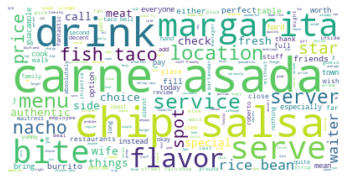

In [0]:
# Create stopword list:


stopwords.update(["one","mexican","food","think","come","back","go", "really","say", "even","like","also","well","delicious","restaurant","know","also","through","las","vega"
                 ,"enjoy","meal","love","amaze","eat","way","much","good","though","look","customer","use","still","however","first","time","start","great","thing","since"
                  ,"see","want","everything","dish","awesome","maybe","taste","would","leave","ask","never","could","try","ok","friend","dinner","get","need","happy","hour"
                 ,"make","except","better","sure","definitely","people","husband","actually","ever","give","tell","keep","alway","pretty","right","something","expect","end"
                 ,"end","lunch","point","bad","best","disappoint","find","probably","let","order","two","little","favorite","tasty","lot","experience","always","take","put"
                  ,"vegas","top","anything","day","usually","must","nice","next","another","recommend","place","work","visit","decide","big","wrong","seem","feel","return"
                 ,"guy","overall","al","kind","every","offer","home","new","stop","many","beanexcellent","enough","highly","small","excellent"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(review_lv_f)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
#plt.show()
plt.savefig("Yelp_Review/wc_lv.png", dpi=200)

In [0]:
bus_id2=info[info['city']=="Phoenix"]['business_id']
bus_id2.head()

0     1Dfx3zM-rW4n-31KeC8sJg
6     Rs8Wi4OEjeOX7LVlzsXDOA
7     c7JoAt6a3Ufkpn3TrGU23A
10    UdL8Z06DaNj6qhen0fEH9A
12    3-aEgS7X2jrbxA7sA1nARw
Name: business_id, dtype: object

In [0]:
review_ph=[]
for id in bus_id2:
  rev = review_word['text'][review_word['business_id']==id]
  try:
    revAll = " ".join(i for i in rev)
  except:
    print(id)
  review_ph.append(revAll)

review_ph_f =  " ".join(j for j in review_ph)

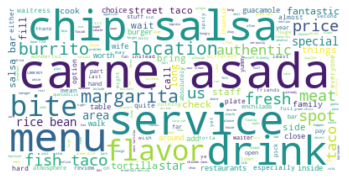

In [0]:
# Create stopword list:


stopwords.update(["one","mexican","food","think","come","back","go", "really","say", "even","like","also","well","delicious","restaurant","know","also","through","las","vega"
                 ,"enjoy","meal","love","amaze","eat","way","much","good","though","look","customer","use","still","however","first","time","start","great","thing","since"
                  ,"see","want","everything","dish","awesome","maybe","taste","would","leave","ask","never","could","try","ok","friend","dinner","get","need","happy","hour"
                 ,"make","except","better","sure","definitely","people","husband","actually","ever","give","tell","keep","alway","pretty","right","something","expect","end"
                 ,"end","lunch","point","bad","best","disappoint","find","probably","let","order","two","little","favorite","tasty","lot","experience","always","take","put"
                  ,"vegas","top","anything","day","usually","must","nice","next","another","recommend","place","work","visit","decide","big","wrong","seem","feel","return"
                 ,"guy","overall","al","kind","every","offer","home","new","stop","many","beanexcellent","enough","highly","small","excellent","serve","phoenix","server"
                 ,"perfect","today"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(review_ph_f)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
#plt.show()
plt.savefig("Yelp_Review/wc_ph.png", dpi=200)

In [0]:
bus_id3=info[info['city']=="Toronto"]['business_id']
bus_id3.head()

2     NPHZkn1e-tSJAbo8Zm9rYw
5     IgQ8lSds3AgLFQsYsshUHQ
8     AXq8uPxqBP-c5PCrnba-4A
17    q8MUVVuQpfR6v0HBHmAFxw
49    a9aW5e731lplWGHUZ02-zQ
Name: business_id, dtype: object

In [0]:
review_to=[]
for id in bus_id3:
  rev = review_word['text'][review_word['business_id']==id]
  try:
    revAll = " ".join(i for i in rev)
  except:
    print(id)
  review_to.append(revAll)

review_ph_f3 =  " ".join(j for j in review_to)

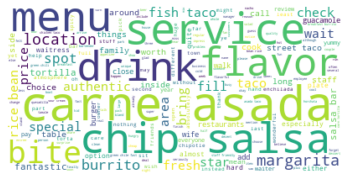

In [0]:
# Create stopword list:


stopwords.update(["one","mexican","food","think","come","back","go", "really","say", "even","like","also","well","delicious","restaurant","know","also","through","las","vega"
                 ,"enjoy","meal","love","amaze","eat","way","much","good","though","look","customer","use","still","however","first","time","start","great","thing","since"
                  ,"see","want","everything","dish","awesome","maybe","taste","would","leave","ask","never","could","try","ok","friend","dinner","get","need","happy","hour"
                 ,"make","except","better","sure","definitely","people","husband","actually","ever","give","tell","keep","alway","pretty","right","something","expect","end"
                 ,"end","lunch","point","bad","best","disappoint","find","probably","let","order","two","little","favorite","tasty","lot","experience","always","take","put"
                  ,"vegas","top","anything","day","usually","must","nice","next","another","recommend","place","work","visit","decide","big","wrong","seem","feel","return"
                 ,"guy","overall","al","kind","every","offer","home","new","stop","many","beanexcellent","enough","highly","small","excellent","serve","phoenix","server"
                 ,"perfect","today","meat","us"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(review_ph_f)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
#plt.show()
plt.savefig("Yelp_Review/wc_to.png", dpi=200)

In [0]:
review_lv_1=[]
for id in bus_id:
  rev = review_word['text'][review_word['business_id']==id ]
  rev1 = rev[review_word['stars']==1.0]
  try:
    revAll = " ".join(i for i in rev1)
  except:
    print(id)
  review_lv_1.append(revAll)

In [0]:
review_1_lv =  " ".join(j for j in review_lv_1)

In [0]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [0]:
from nltk.tokenize import word_tokenize
word_lv_1=word_tokenize(review_1_lv)

In [0]:
len(word_lv_1)

815972

In [0]:
from nltk.probability import FreqDist
fdist_lv_1 = FreqDist(word_lv_1)

In [0]:
fdist_lv_1['carne']/len(word_lv_1)

0.0012451407646340805

lv_star 1.0

"carne":0.0012451407646340805            

In [0]:
review_lv_2=[]
for id in bus_id:
  rev = review_word['text'][review_word['business_id']==id ]
  rev1 = rev[review_word['stars']==2.0]
  try:
    revAll = " ".join(i for i in rev1)
  except:
    print(id)
  review_lv_2.append(revAll)

review_2_lv =  " ".join(j for j in review_lv_2)
word_lv_2=word_tokenize(review_2_lv)
fdist_lv_2 = FreqDist(word_lv_2)
fdist_lv_2['carne']/len(word_lv_2)

0.0015617045169929494

lv_star 2.0

"carne":0.0015617045169929494

In [0]:
review_lv_3=[]
for id in bus_id:
  rev = review_word['text'][review_word['business_id']==id ]
  rev1 = rev[review_word['stars']==3.0]
  try:
    revAll = " ".join(i for i in rev1)
  except:
    print(id)
  review_lv_3.append(revAll)

review_3_lv =  " ".join(j for j in review_lv_3)
word_lv_3=word_tokenize(review_3_lv)
fdist_lv_3 = FreqDist(word_lv_3)
fdist_lv_3['carne']/len(word_lv_3)

0.0017666752510945146

lv_star 3.0

"carne": 0.0017666752510945146

In [0]:
review_lv_4=[]
for id in bus_id:
  rev = review_word['text'][review_word['business_id']==id ]
  rev1 = rev[review_word['stars']==4.0]
  try:
    revAll = " ".join(i for i in rev1)
  except:
    print(id)
  review_lv_4.append(revAll)

review_4_lv =  " ".join(j for j in review_lv_4)
word_lv_4=word_tokenize(review_4_lv)
fdist_lv_4 = FreqDist(word_lv_4)
fdist_lv_4['carne']/len(word_lv_4)

0.0023349285845635104

In [0]:
review_lv_5=[]
for id in bus_id:
  rev = review_word['text'][review_word['business_id']==id ]
  rev1 = rev[review_word['stars']==5.0]
  try:
    revAll = " ".join(i for i in rev1)
  except:
    print(id)
  review_lv_5.append(revAll)

review_5_lv =  " ".join(j for j in review_lv_5)
word_lv_5=word_tokenize(review_5_lv)
fdist_lv_5 = FreqDist(word_lv_5)
fdist_lv_5['carne']/len(word_lv_5)

0.0023902469519098074

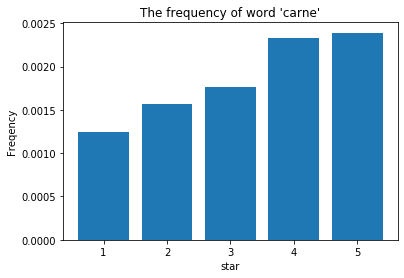

In [0]:
plt.title("The frequency of word 'carne'")
plt.xlabel("star")
plt.ylabel("Freqency")
plt.bar([1,2,3,4,5],[fdist_lv_1['carne']/len(word_lv_1),fdist_lv_2['carne']/len(word_lv_2),fdist_lv_3['carne']/len(word_lv_3),fdist_lv_4['carne']/len(word_lv_4),fdist_lv_5['carne']/len(word_lv_5)])
plt.savefig("Yelp_Review/lv_carne.png", dpi=200)

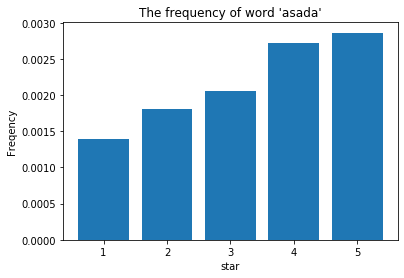

In [0]:
plt.title("The frequency of word 'asada'")
plt.xlabel("star")
plt.ylabel("Freqency")
plt.bar([1,2,3,4,5],[fdist_lv_1['asada']/len(word_lv_1),fdist_lv_2['asada']/len(word_lv_2),fdist_lv_3['asada']/len(word_lv_3),fdist_lv_4['asada']/len(word_lv_4),fdist_lv_5['asada']/len(word_lv_5)])
plt.savefig("Yelp_Review/lv_asada.png", dpi=200)

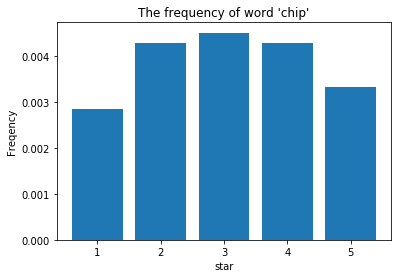

In [0]:
plt.title("The frequency of word 'chip'")
plt.xlabel("star")
plt.ylabel("Freqency")
plt.bar([1,2,3,4,5],[fdist_lv_1['chip']/len(word_lv_1),fdist_lv_2['chip']/len(word_lv_2),fdist_lv_3['chip']/len(word_lv_3),fdist_lv_4['chip']/len(word_lv_4),fdist_lv_5['chip']/len(word_lv_5)])
plt.savefig("Yelp_Review/lv_chip.png", dpi=200)

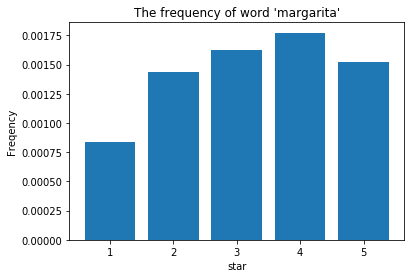

In [0]:
plt.title("The frequency of word 'margarita'")
plt.xlabel("star")
plt.ylabel("Freqency")
plt.bar([1,2,3,4,5],[fdist_lv_1['margarita']/len(word_lv_1),fdist_lv_2['margarita']/len(word_lv_2),fdist_lv_3['margarita']/len(word_lv_3),fdist_lv_4['margarita']/len(word_lv_4),fdist_lv_5['margarita']/len(word_lv_5)])
plt.savefig("Yelp_Review/lv_margarita.png", dpi=200)

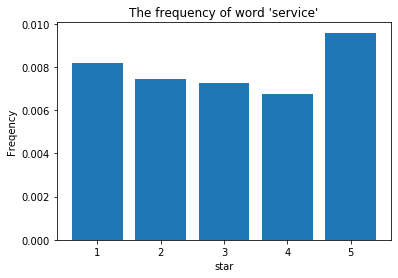

In [0]:
plt.title("The frequency of word 'service'")
plt.xlabel("star")
plt.ylabel("Freqency")
plt.bar([1,2,3,4,5],[fdist_lv_1['service']/len(word_lv_1),fdist_lv_2['service']/len(word_lv_2),fdist_lv_3['service']/len(word_lv_3),fdist_lv_4['service']/len(word_lv_4),fdist_lv_5['service']/len(word_lv_5)])
plt.savefig("Yelp_Review/lv_service.png", dpi=200)

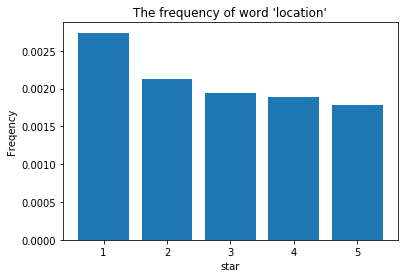

In [0]:
plt.title("The frequency of word 'location'")
plt.xlabel("star")
plt.ylabel("Freqency")
plt.bar([1,2,3,4,5],[fdist_lv_1['location']/len(word_lv_1),fdist_lv_2['location']/len(word_lv_2),fdist_lv_3['location']/len(word_lv_3),fdist_lv_4['location']/len(word_lv_4),fdist_lv_5['location']/len(word_lv_5)])
plt.savefig("Yelp_Review/lv_location.png", dpi=200)

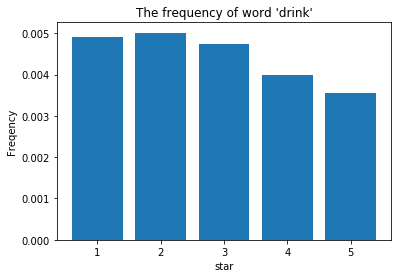

In [0]:
plt.title("The frequency of word 'drink'")
plt.xlabel("star")
plt.ylabel("Freqency")
plt.bar([1,2,3,4,5],[fdist_lv_1['drink']/len(word_lv_1),fdist_lv_2['drink']/len(word_lv_2),fdist_lv_3['drink']/len(word_lv_3),fdist_lv_4['drink']/len(word_lv_4),fdist_lv_5['drink']/len(word_lv_5)])
plt.savefig("Yelp_Review/lv_drink.png", dpi=200)

In [0]:
review_ph_1=[]
for id in bus_id2:
  rev = review_word['text'][review_word['business_id']==id ]
  rev1 = rev[review_word['stars']==1.0]
  try:
    revAll = " ".join(i for i in rev1)
  except:
    print(id)
  review_ph_1.append(revAll)

review_1_ph =  " ".join(j for j in review_ph_1)
word_ph_1=word_tokenize(review_1_ph)
fdist_ph_1 = FreqDist(word_ph_1)
fdist_ph_1['carne']/len(word_ph_1)

0.0012234785534405237

In [0]:
review_ph_2=[]
for id in bus_id2:
  rev = review_word['text'][review_word['business_id']==id ]
  rev1 = rev[review_word['stars']==2.0]
  try:
    revAll = " ".join(i for i in rev1)
  except:
    print(id)
  review_ph_2.append(revAll)

review_2_ph =  " ".join(j for j in review_ph_2)
word_ph_2=word_tokenize(review_2_ph)
fdist_ph_2 = FreqDist(word_ph_2)
fdist_ph_2['carne']/len(word_ph_2)

0.0018143695065964576

In [0]:
review_ph_3=[]
for id in bus_id2:
  rev = review_word['text'][review_word['business_id']==id ]
  rev1 = rev[review_word['stars']==3.0]
  try:
    revAll = " ".join(i for i in rev1)
  except:
    print(id)
  review_ph_3.append(revAll)

review_3_ph =  " ".join(j for j in review_ph_3)
word_ph_3=word_tokenize(review_3_ph)
fdist_ph_3 = FreqDist(word_ph_3)
fdist_ph_3['carne']/len(word_ph_3)

0.0021124433064814777

In [0]:
review_ph_4=[]
for id in bus_id2:
  rev = review_word['text'][review_word['business_id']==id ]
  rev1 = rev[review_word['stars']==4.0]
  try:
    revAll = " ".join(i for i in rev1)
  except:
    print(id)
  review_ph_4.append(revAll)

review_4_ph =  " ".join(j for j in review_ph_4)
word_ph_4=word_tokenize(review_4_ph)
fdist_ph_4 = FreqDist(word_ph_4)
fdist_ph_4['carne']/len(word_ph_4)

0.0023991914535888693

In [0]:
review_ph_5=[]
for id in bus_id2:
  rev = review_word['text'][review_word['business_id']==id ]
  rev1 = rev[review_word['stars']==5.0]
  try:
    revAll = " ".join(i for i in rev1)
  except:
    print(id)
  review_ph_5.append(revAll)

review_5_ph =  " ".join(j for j in review_ph_5)
word_ph_5=word_tokenize(review_5_ph)
fdist_ph_5 = FreqDist(word_ph_5)
fdist_ph_5['carne']/len(word_ph_5)

0.0026246408678023843

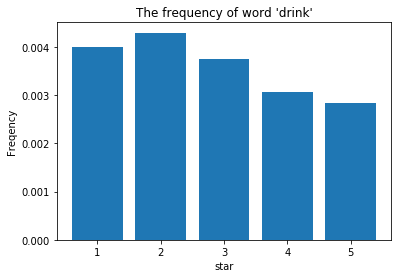

In [0]:
plt.title("The frequency of word 'drink'")
plt.xlabel("star")
plt.ylabel("Freqency")
plt.bar([1,2,3,4,5],[fdist_ph_1['drink']/len(word_ph_1),fdist_ph_2['drink']/len(word_ph_2),fdist_ph_3['drink']/len(word_ph_3),fdist_ph_4['drink']/len(word_ph_4),fdist_ph_5['drink']/len(word_ph_5)])
plt.savefig("Yelp_Review/ph_drink.png", dpi=200)

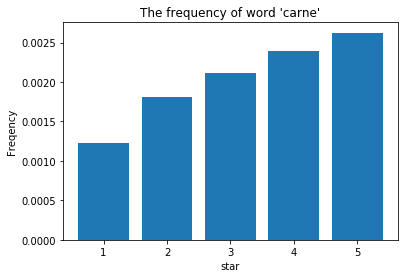

In [0]:
plt.title("The frequency of word 'carne'")
plt.xlabel("star")
plt.ylabel("Freqency")
plt.bar([1,2,3,4,5],[fdist_ph_1['carne']/len(word_ph_1),fdist_ph_2['carne']/len(word_ph_2),fdist_ph_3['carne']/len(word_ph_3),fdist_ph_4['carne']/len(word_ph_4),fdist_ph_5['carne']/len(word_ph_5)])
plt.savefig("Yelp_Review/ph_carne.png", dpi=200)

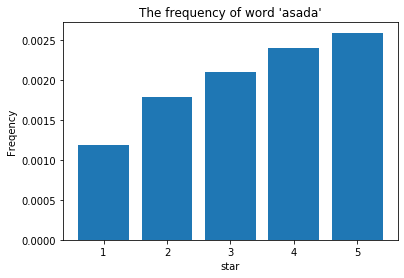

In [0]:
plt.title("The frequency of word 'asada'")
plt.xlabel("star")
plt.ylabel("Freqency")
plt.bar([1,2,3,4,5],[fdist_ph_1['asada']/len(word_ph_1),fdist_ph_2['asada']/len(word_ph_2),fdist_ph_3['asada']/len(word_ph_3),fdist_ph_4['asada']/len(word_ph_4),fdist_ph_5['asada']/len(word_ph_5)])
plt.savefig("Yelp_Review/ph_asada.png", dpi=200)

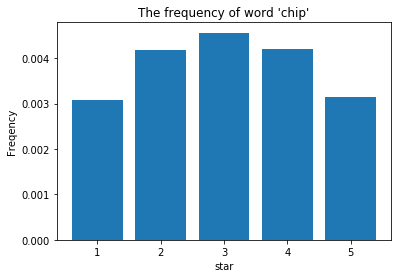

In [0]:
plt.title("The frequency of word 'chip'")
plt.xlabel("star")
plt.ylabel("Freqency")
plt.bar([1,2,3,4,5],[fdist_ph_1['chip']/len(word_ph_1),fdist_ph_2['chip']/len(word_ph_2),fdist_ph_3['chip']/len(word_ph_3),fdist_ph_4['chip']/len(word_ph_4),fdist_ph_5['chip']/len(word_ph_5)])
plt.savefig("Yelp_Review/ph_chip.png", dpi=200)

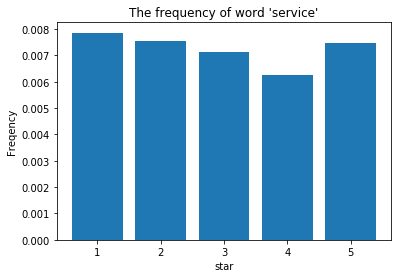

In [0]:
plt.title("The frequency of word 'service'")
plt.xlabel("star")
plt.ylabel("Freqency")
plt.bar([1,2,3,4,5],[fdist_ph_1['service']/len(word_ph_1),fdist_ph_2['service']/len(word_ph_2),fdist_ph_3['service']/len(word_ph_3),fdist_ph_4['service']/len(word_ph_4),fdist_ph_5['service']/len(word_ph_5)])
plt.savefig("Yelp_Review/ph_service.png", dpi=200)

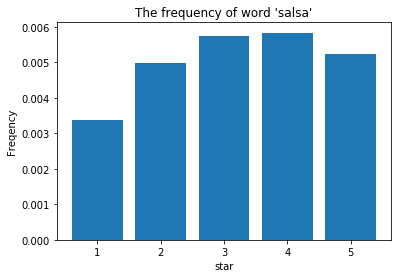

In [0]:
plt.title("The frequency of word 'salsa'")
plt.xlabel("star")
plt.ylabel("Freqency")
plt.bar([1,2,3,4,5],[fdist_ph_1['salsa']/len(word_ph_1),fdist_ph_2['salsa']/len(word_ph_2),fdist_ph_3['salsa']/len(word_ph_3),fdist_ph_4['salsa']/len(word_ph_4),fdist_ph_5['salsa']/len(word_ph_5)])
plt.savefig("Yelp_Review/ph_salsa.png", dpi=200)

In [0]:
review_to_1=[]
for id in bus_id3:
  rev = review_word['text'][review_word['business_id']==id ]
  rev1 = rev[review_word['stars']==1.0]
  try:
    revAll = " ".join(i for i in rev1)
  except:
    print(id)
  review_to_1.append(revAll)

review_1_to =  " ".join(j for j in review_to_1)
word_to_1=word_tokenize(review_1_to)
fdist_to_1 = FreqDist(word_to_1)
fdist_to_1['carne']/len(word_to_1)

0.00010574364216351492

In [0]:
review_to_2=[]
for id in bus_id3:
  rev = review_word['text'][review_word['business_id']==id ]
  rev1 = rev[review_word['stars']==2.0]
  try:
    revAll = " ".join(i for i in rev1)
  except:
    print(id)
  review_to_2.append(revAll)

review_2_to =  " ".join(j for j in review_to_2)
word_to_2=word_tokenize(review_2_to)
fdist_to_2 = FreqDist(word_to_2)
fdist_to_2['carne']/len(word_to_2)

0.0001270298308386086

In [0]:
review_to_3=[]
for id in bus_id3:
  rev = review_word['text'][review_word['business_id']==id ]
  rev1 = rev[review_word['stars']==3.0]
  try:
    revAll = " ".join(i for i in rev1)
  except:
    print(id)
  review_to_3.append(revAll)

review_3_to =  " ".join(j for j in review_to_3)
word_to_3=word_tokenize(review_3_to)
fdist_to_3 = FreqDist(word_to_3)
fdist_to_3['carne']/len(word_to_3)

0.0002803811344864199

In [0]:
review_to_4=[]
for id in bus_id3:
  rev = review_word['text'][review_word['business_id']==id ]
  rev1 = rev[review_word['stars']==4.0]
  try:
    revAll = " ".join(i for i in rev1)
  except:
    print(id)
  review_to_4.append(revAll)

review_4_to =  " ".join(j for j in review_to_4)
word_to_4=word_tokenize(review_4_to)
fdist_to_4 = FreqDist(word_to_4)
fdist_to_4['carne']/len(word_to_4)

0.00025680892578501183

In [0]:
review_to_5=[]
for id in bus_id3:
  rev = review_word['text'][review_word['business_id']==id ]
  rev1 = rev[review_word['stars']==5.0]
  try:
    revAll = " ".join(i for i in rev1)
  except:
    print(id)
  review_to_5.append(revAll)

review_5_to =  " ".join(j for j in review_to_5)
word_to_5=word_tokenize(review_5_to)
fdist_to_5 = FreqDist(word_to_5)
fdist_to_5['carne']/len(word_to_5)

0.0003136513934813415

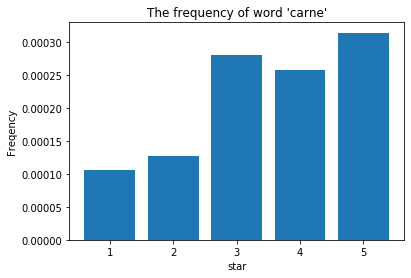

In [0]:
plt.title("The frequency of word 'carne'")
plt.xlabel("star")
plt.ylabel("Freqency")
plt.bar([1,2,3,4,5],[fdist_to_1['carne']/len(word_to_1),fdist_to_2['carne']/len(word_to_2),fdist_to_3['carne']/len(word_to_3),fdist_to_4['carne']/len(word_to_4),fdist_to_5['carne']/len(word_to_5)])
plt.savefig("Yelp_Review/to_carne.png", dpi=200)

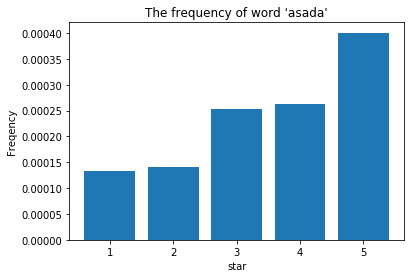

In [0]:
plt.title("The frequency of word 'asada'")
plt.xlabel("star")
plt.ylabel("Freqency")
plt.bar([1,2,3,4,5],[fdist_to_1['asada']/len(word_to_1),fdist_to_2['asada']/len(word_to_2),fdist_to_3['asada']/len(word_to_3),fdist_to_4['asada']/len(word_to_4),fdist_to_5['asada']/len(word_to_5)])
plt.savefig("Yelp_Review/to_asada.png", dpi=200)

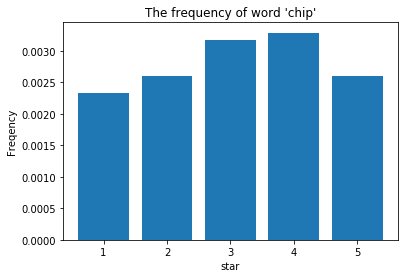

In [0]:
plt.title("The frequency of word 'chip'")
plt.xlabel("star")
plt.ylabel("Freqency")
plt.bar([1,2,3,4,5],[fdist_to_1['chip']/len(word_to_1),fdist_to_2['chip']/len(word_to_2),fdist_to_3['chip']/len(word_to_3),fdist_to_4['chip']/len(word_to_4),fdist_to_5['chip']/len(word_to_5)])
plt.savefig("Yelp_Review/to_chip.png", dpi=200)

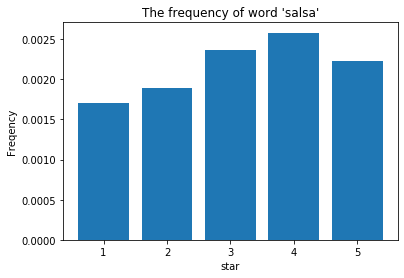

In [0]:
plt.title("The frequency of word 'salsa'")
plt.xlabel("star")
plt.ylabel("Freqency")
plt.bar([1,2,3,4,5],[fdist_to_1['salsa']/len(word_to_1),fdist_to_2['salsa']/len(word_to_2),fdist_to_3['salsa']/len(word_to_3),fdist_to_4['salsa']/len(word_to_4),fdist_to_5['salsa']/len(word_to_5)])
plt.savefig("Yelp_Review/to_salsa.png", dpi=200)

In [0]:
plt.title("The frequency of word 'salsa'")
plt.xlabel("star")
plt.ylabel("Freqency")
plt.bar([1,2,3,4,5],[fdist_to_1['salsa']/len(word_to_1),fdist_to_2['salsa']/len(word_to_2),fdist_to_3['salsa']/len(word_to_3),fdist_to_4['salsa']/len(word_to_4),fdist_to_5['salsa']/len(word_to_5)])
plt.savefig("Yelp_Review/to_salsa.png", dpi=200)

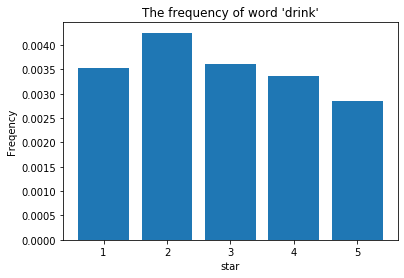

In [0]:
plt.title("The frequency of word 'drink'")
plt.xlabel("star")
plt.ylabel("Freqency")
plt.bar([1,2,3,4,5],[fdist_to_1['drink']/len(word_to_1),fdist_to_2['drink']/len(word_to_2),fdist_to_3['drink']/len(word_to_3),fdist_to_4['drink']/len(word_to_4),fdist_to_5['drink']/len(word_to_5)])
plt.savefig("Yelp_Review/to_drink.png", dpi=200)

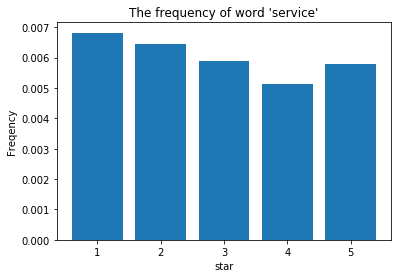

In [0]:
plt.title("The frequency of word 'service'")
plt.xlabel("star")
plt.ylabel("Freqency")
plt.bar([1,2,3,4,5],[fdist_to_1['service']/len(word_to_1),fdist_to_2['service']/len(word_to_2),fdist_to_3['service']/len(word_to_3),fdist_to_4['service']/len(word_to_4),fdist_to_5['service']/len(word_to_5)])
plt.savefig("Yelp_Review/to_service.png", dpi=200)